In [6]:
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import warnings
from tweepy import OAuthHandler
import matplotlib
import os
import time
import json
from timeit import default_timer as timer
import seaborn as sns
import re


%matplotlib inline

**GATHERING**

**1) Twitter archived enhanced data**

In [7]:
# loading the twitter enhanced data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**2) Image prediction data**

In [10]:
# accessing tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Reading the tsv file   
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [11]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
image_pred.tail()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**3)Accessing Data using twitter api**

In [ ]:
# API for each file mentioned in the twitter data and save as json text file
# These are hidden to maintain the terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [13]:
#feeding the tweet json file into the json twitter file
with open('tweet_json.txt', 'r') as f:
    twitter_json = pd.read_json(f, lines=True)
    twitter_json = twitter_json[['id','favorite_count','retweet_count']]
twitter_json.head(5)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**ASSESSING THE DATA**

**Quality issues**

**1) Archive**

   
    1. name column contains unnecessary names like 'a','an' and 'none' which should be removed
    2. duplicated and redundant values need to be taken out
    6. certain column's data types need to be fixed
    7. retweets columns should be removed
    8. fixing the rating_numerator that have decimals
    2. doggo, floofer, pupper and puppo contain only 'none' values which needs to be taken care of
    3. Changing timestamp  object instead to datetime
    4. Unwanted columns need to be taken care of
    
    
**2) Image predictions**
  
    1. few words are seperated by underscore in p1.p2 and p3.
    



**Tidiness issues**

    
    1. the columns that have been split up can be combined into one for making it easier to understand(dog_type)
    2. creating a master dataset by merging all the 3 datasets
    

In [14]:
twitter_archive



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive.name.value_counts()


None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Godi         1
Kallie       1
Donny        1
Tessa        1
Olaf         1
Name: name, Length: 957, dtype: int64

In [18]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
otter                   1
sunglasses              1
cliff                   1
radio_telescope         1
dining_table            1
Name: p1, Length: 378, dtype: int64

In [21]:
image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
dock                    1
soccer_ball             1
cradle                  1
common_newt             1
cornet                  1
Name: p2, Length: 405, dtype: int64

In [22]:
image_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
hand_blower            1
wild_boar              1
oscilloscope           1
screw                  1
coral_reef             1
Name: p3, Length: 408, dtype: int64

In [23]:
twitter_json


,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [24]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
twitter_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [26]:
sum(twitter_json['id'].duplicated())

0

**Cleaning**

In [27]:
#make a copy of dataset
new_twitter_archive_clean = twitter_archive.copy()
new_image_pred_clean = image_pred.copy()
new_twitter_json_clean = twitter_json.copy()

1. In the name column, replacing few names

Define- Making changes in the name columns that contain names like (a,an,none etc) to 'NaN' values

In [28]:
# creation of a list containing all names in lowercase
lower_case_name = []
for row in new_twitter_archive_clean['name']:
    if row[0].islower() and row not in lower_case_name:
        lower_case_name.append(row)
print(lower_case_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [29]:
# Replacing all the values with none
new_twitter_archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)
#Replacing lower case to NaN
new_twitter_archive_clean['name'].replace(lower_case_name, 
                        np.nan,
                       inplace = True)

Testing

In [30]:
new_twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6,10,Karl,None,None,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,None,None,None,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,NaN,None,None,None,None
1789,677547928504967168,NaN,NaN,2015-12-17 17:56:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not much to say here. I just think everyone ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677547928...,12,10,NaN,None,None,None,None


2.Timestamp is an object and therefore needs to be converted to datetime



In [31]:
#change to datetime
new_twitter_archive_clean['timestamp'] = new_twitter_archive_clean['timestamp'].str.slice(start=0, stop=-6)
new_twitter_archive_clean['timestamp'] = pd.to_datetime(new_twitter_archive_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [32]:
new_twitter_archive_clean['timestamp'].sample(3)

1303   2016-03-09 04:19:44
1368   2016-02-24 17:04:07
1086   2016-06-02 00:32:39
Name: timestamp, dtype: datetime64[ns]

3.Dropping off unwanted columns

Define-columns that are not needed are dropped and now it contains  only Nan values

In [33]:
#listing
print(list(new_twitter_archive_clean))

#dropping off the columns 
new_twitter_archive_clean = new_twitter_archive_clean.drop(['source', 'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                        'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


Testing

In [34]:
new_twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1022,746542875601690625,2016-06-25 03:17:46,Here's a golden floofer helping with the groce...,NaN,NaN,NaN,11,10,NaN,None,floofer,None,None
2309,666804364988780544,2015-11-18 02:25:23,This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,8,10,Jockson,None,None,None,None
747,779834332596887552,2016-09-25 00:06:08,This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,11,10,Scout,None,None,None,None


4.retweet columns removed

Define: columns that are not useful for our analysis should be removed

In [35]:
# removing retweet columns

new_twitter_archive_clean = new_twitter_archive_clean[np.isnan(new_twitter_archive_clean.retweeted_status_id)]
new_twitter_archive_clean.shape[0]
new_twitter_archive_clean = new_twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

Testing

In [36]:
new_twitter_archive_clean.sample(3)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
968,750147208377409536,2016-07-05 02:00:06,"And finally, happy 4th of July from the squad ...",13,10,NaN,None,None,None,None
1745,679148763231985668,2015-12-22 03:57:37,I know everyone's excited for Christmas but th...,8,10,NaN,None,None,None,None
1852,675707330206547968,2015-12-12 16:02:36,We've got ourselves a battle here. Watch out R...,11,10,NaN,None,None,None,None


5. Chang the  name and type of the column 'id'

Define- To make merging in future easier, we change the name and type of 'id' column in the json file

In [37]:
#renaming 
new_twitter_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True) 
new_twitter_json_clean.head(2)

#coverting data type
new_twitter_json_clean['tweet_id'] = new_twitter_json_clean['tweet_id'].astype(int)



Testing

In [38]:

print(new_twitter_json_clean['tweet_id'].dtypes)
new_twitter_json_clean.sample(2)

int64


,tweet_id,favorite_count,retweet_count
2104,670468609693655041,375,90
2025,671874878652489728,1330,601


6. Tweets without images are removed

Define: not null is used to find images without any tweets

In [39]:
# removing the tweets
new_image_pred_clean = new_image_pred_clean[pd.notnull(new_image_pred_clean['jpg_url'])]

new_image_pred_clean['jpg_url']

0       https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1       https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2       https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3       https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4       https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
                             ...                       
2070    https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
2071    https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
2072    https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2073    https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2074    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
Name: jpg_url, Length: 2075, dtype: object

7. Where the denominator is not equal to 10, those columns are removed

Define- So that there are no issues in ratings, cases where denominator is not 10 is deleted

In [40]:
# Removing the columns
new_twitter_archive_clean.drop(new_twitter_archive_clean[new_twitter_archive_clean.rating_denominator != 10].index, inplace = True)

Testing


In [41]:
new_twitter_archive_clean.rating_denominator.value_counts()


10    2153
Name: rating_denominator, dtype: int64

8. Taking out cases where numerator has decimal values



In [42]:
# View the tweets with decimals 
new_twitter_archive_clean[new_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/aasthajain/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,2015-12-28 05:07:27,I've been told there's a slight possibility he...,5,10,NaN,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26,10,NaN,None,None,None,None


In [43]:
# Change the datatype to float
new_twitter_archive_clean['rating_denominator'] = new_twitter_archive_clean['rating_denominator'].astype('float')
new_twitter_archive_clean['rating_numerator'] = new_twitter_archive_clean['rating_numerator'].astype('float')


In [44]:
# Set the specific tweets change values
new_twitter_archive_clean.loc[(new_twitter_archive_clean['tweet_id'] == 778027034220126208) & (new_twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
new_twitter_archive_clean.loc[(new_twitter_archive_clean['tweet_id'] == 786709082849828864) & (new_twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
new_twitter_archive_clean.loc[(new_twitter_archive_clean['tweet_id'] == 680494726643068929) & (new_twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26
new_twitter_archive_clean.loc[(new_twitter_archive_clean['tweet_id'] == 883482846933004288) & (new_twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5



Testing


In [45]:
new_twitter_archive_clean[new_twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/aasthajain/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,13.50,10.0,Bella,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0,Sophie,None,None,pupper,None
1689,681340665377193984,2015-12-28 05:07:27,I've been told there's a slight possibility he...,5.00,10.0,NaN,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,11.26,10.0,NaN,None,None,None,None


**Tidiness issues**


1. Merging all the datasets to obtain the one master dataset

In [46]:
from functools import reduce
df_combine = [new_twitter_archive_clean, new_image_pred_clean, new_twitter_json_clean]
twitter_master_dataset = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df_combine)


2. Combining the various dog types into one column called the  'dog_category'

In [47]:
twitter_master_dataset.doggo.replace('None', '', inplace=True)
twitter_master_dataset.floofer.replace('None', '', inplace=True)
twitter_master_dataset.pupper.replace('None', '', inplace=True)
twitter_master_dataset.puppo.replace('None', '', inplace=True)
#creatingg the column
twitter_master_dataset['dog_category'] = twitter_master_dataset.doggo + twitter_master_dataset.floofer + twitter_master_dataset.pupper + twitter_master_dataset.puppo

Testing

In [48]:
twitter_master_dataset['dog_category']

0        
1        
2        
3        
4        
       ..
1971     
1972     
1973     
1974     
1975     
Name: dog_category, Length: 1976, dtype: object

 There are a few columns have more than one dog category which need to be taken care of

In [49]:
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'doggopupper', 'dog_category'] = 'doggo,pupper' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'doggopuppo', 'dog_category'] = 'doggo,puppo' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'pupperdoggo', 'dog_category'] = 'pupper.doggo' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'pupperpuppo', 'dog_category'] = 'pupper,puppo' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'pupperfloofer', 'dog_category'] = 'pupper,floofer'
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'puppopupper', 'dog_category'] = 'puppo,pupper' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'puppodoggo', 'dog_category'] = 'puppo,doggo' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'puppofloofer', 'dog_category'] = 'puppo,floofer'
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'doggofloofer', 'dog_category'] = 'doggo,floofer'
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'flooferpupper', 'dog_category'] = 'floofer,pupper' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'flooferpuppo', 'dog_category'] = 'floofer,puppo' 
twitter_master_dataset.loc[twitter_master_dataset.dog_category == 'flooferdoggo', 'dog_category'] = 'floofer,doggo'


In [50]:
twitter_master_dataset['dog_category'].value_counts()

                 1670
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_category, dtype: int64

Creating a csv file by storing the contents of the file

In [51]:
#creation of master csv file
twitter_master_dataset.to_csv('new_twitter_archive_master.csv', encoding='utf-8', index=False)

**Analysis and Visualization**

**1.Finding the most popular dog category**

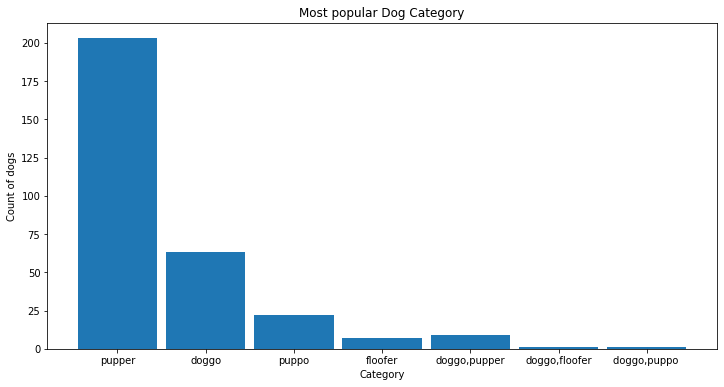

In [53]:
dog_types = ['pupper', 'doggo', 'puppo', 'floofer', 'doggo,pupper','doggo,floofer','doggo,puppo ']
dog_count = [203, 63, 22, 7, 9,1,1]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_types, dog_count, width = 0.9)
ax.set_ylabel('Count of dogs')
ax.set_xlabel('Category')
plt.title("Most popular Dog Category")
plt.show()

We can see from the above histogram  that the pupper is the most favorite dog category followed by the doggo and then the puppo category. Columns having multiple dog categories are few in number as seen by the graph.


**2.Graph between retweet count and favourite count**

/Users/aasthajain/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


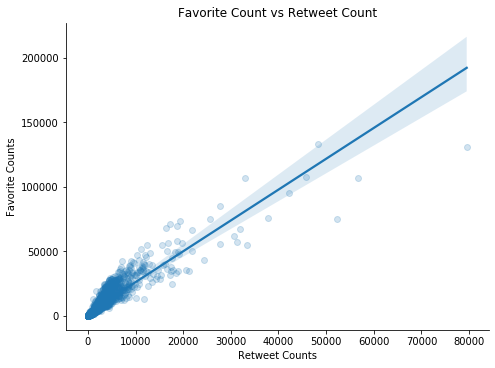

In [54]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_master_dataset,
           size = 5,
           aspect=1.4,
           scatter_kws={'alpha':1/5});
#plotting the graph
plt.title('Favorite Count vs Retweet Count');
plt.xlabel('Retweet Counts');
plt.ylabel('Favorite Counts');

 We can  say that the tweets being retweed most are the favourite ones by seeing the graph above .Also, there is a positive correlation between the two counts.

**3. Finding the most popular dog breeds**

In [75]:
twitter_master_dataset['dog_breeds'] = 'None'

for i, row in twitter_master_dataset.iterrows():

    if row.p1_dog:
        twitter_master_dataset.at[i]= row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_master_dataset.at[i]= row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_master_dataset.at[i]= row.p3
    else:
        twitter_master_dataset.at[i]='None'

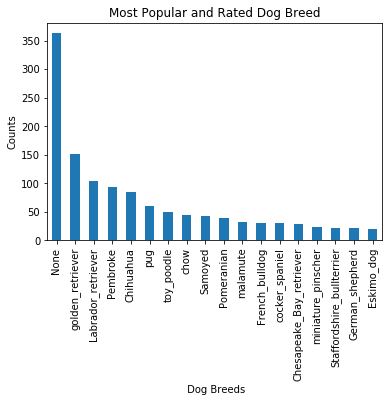

In [76]:
# Plotting a Histogram 
dogs_breed = twitter_master_dataset.groupby('dog_breeds').filter(lambda x: len(x) >= 20)
dogs_breed['dog_breeds'].value_counts().plot(kind = 'bar')
plt.title('Most Popular and Rated Dog Breed')
plt.ylabel('Counts')
plt.xlabel(' Dog Breeds');